In [519]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Описание датасета

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

**Пути к директориям и файлам**

In [520]:
TRAIN_DATASET_PATH = './course_project_train.csv'
TEST_DATASET_PATH = './course_project_test.csv'

**Загрузка данных**

In [521]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)

df_test = pd.read_csv(TEST_DATASET_PATH)

df_train.shape, df_test.shape

((7500, 17), (2500, 16))

In [522]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [523]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [524]:
df_train.select_dtypes(include=['object'])

,Home Ownership,Years in current job,Purpose,Term
0,Own Home,NaN,debt consolidation,Short Term
1,Own Home,10+ years,debt consolidation,Long Term
2,Home Mortgage,8 years,debt consolidation,Short Term
3,Own Home,6 years,debt consolidation,Short Term
4,Rent,8 years,debt consolidation,Short Term
...,...,...,...,...
7495,Rent,< 1 year,other,Short Term
7496,Home Mortgage,1 year,debt consolidation,Long Term
7497,Rent,6 years,buy a car,Short Term
7498,Home Mortgage,NaN,debt consolidation,Short Term






# Уменьшение объема памяти датасета

In [525]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col]. astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                       
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                       df[col] = df[col].astype(np.float32)
                else:
                       df[col] = df[col].astype(np.float64)

    
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:1f}%'.format(100 * (start_mem - end_mem) / start_mem))
                       
    return df

In [526]:
reduce_mem_usage(df_train)

Memory usage of dataframe is 0.97 MB
Memory usage after optimization is: 0.58 MB
Decreased by 40.436102%


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.299999,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,100000000.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.300000,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.000000,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,100000000.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.500000,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.600000,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,402192.0,< 1 year,0.0,3.0,8.500000,107866.0,0.0,NaN,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0
7496,Home Mortgage,1533984.0,1 year,0.0,10.0,26.500000,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1
7497,Rent,1878910.0,6 years,0.0,12.0,32.099998,1778920.0,0.0,NaN,0.0,buy a car,Short Term,100000000.0,477812.0,12479.0,748.0,0
7498,Home Mortgage,NaN,NaN,0.0,21.0,26.500000,1141250.0,0.0,NaN,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,NaN,0


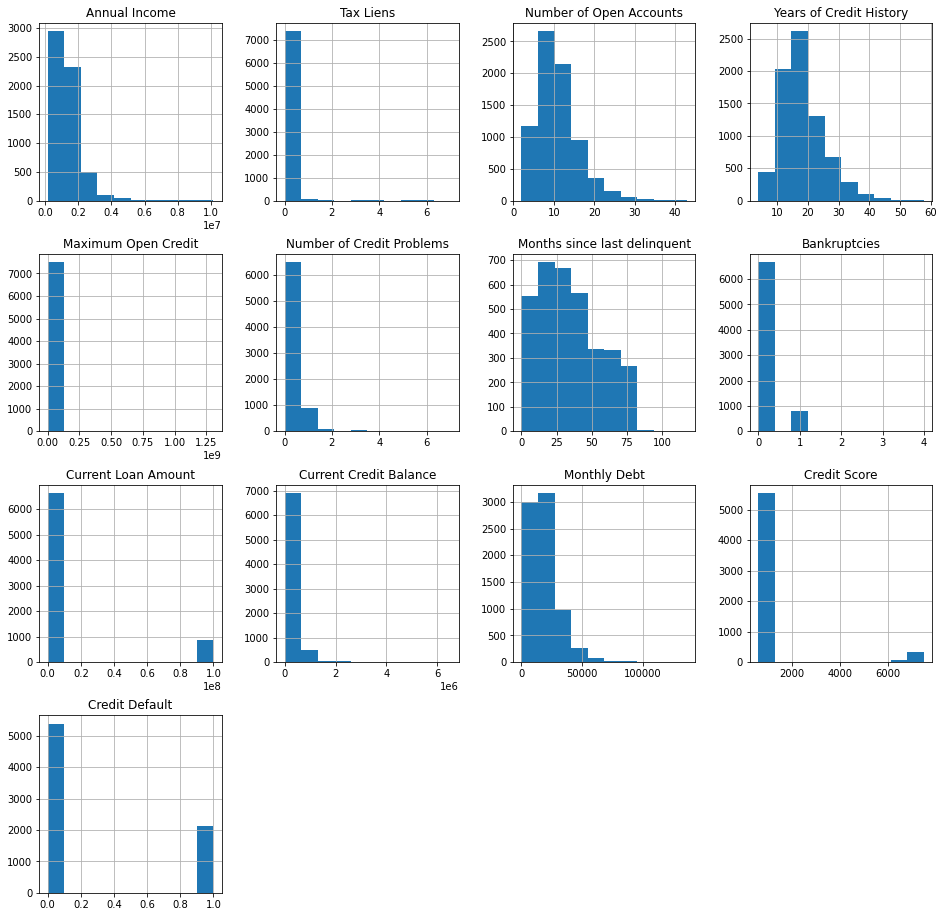

In [527]:
df_train.hist(figsize=(16,16))
plt.show()

In [528]:
dff = df_train.select_dtypes(include=['float32'])

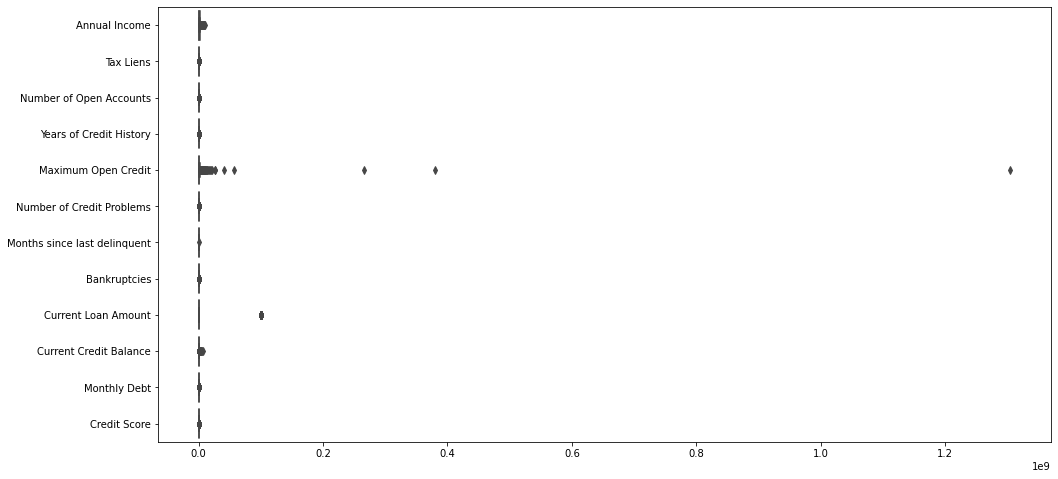

In [529]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=dff, orient='h')
plt.show()

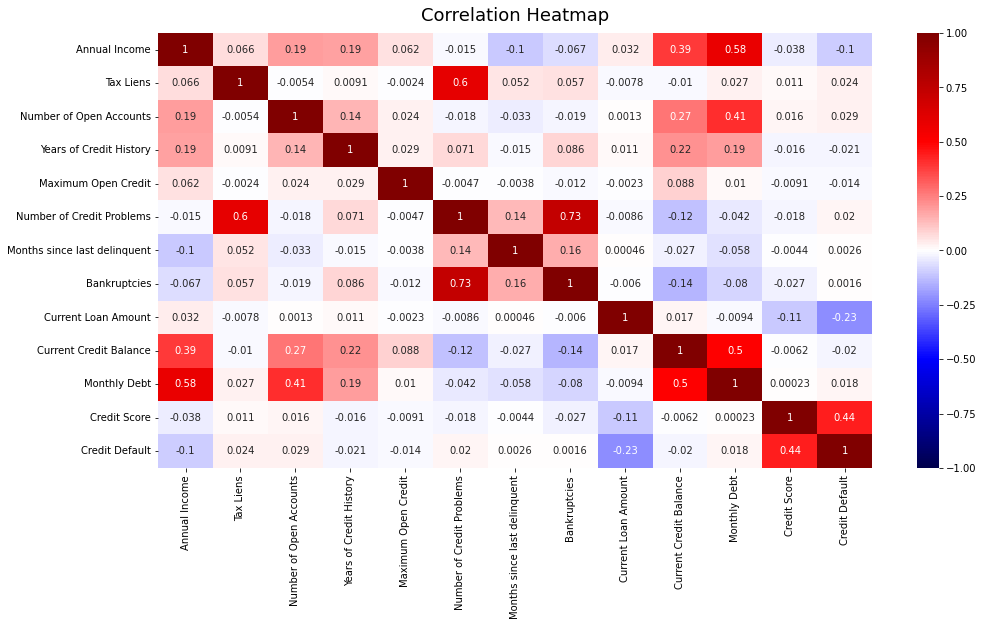

In [530]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, cmap='seismic')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);



# Обработка данных



### *Home Ownership*

In [531]:
df_train['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [532]:
df_train.loc[df_train['Home Ownership'] == 'Have Mortgage', 'Home Ownership'] = 'Home Mortgage'

In [533]:
df_train['Home Ownership'].value_counts()

Home Mortgage    3649
Rent             3204
Own Home          647
Name: Home Ownership, dtype: int64

In [534]:
df_train = pd.get_dummies(df_train, columns=['Home Ownership'])

In [535]:
df_train.sample(2)

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
3605,4317750.0,4 years,0.0,6.0,17.000000,1304908.0,0.0,NaN,0.0,debt consolidation,Short Term,666600.0,1063848.0,43897.0,677.0,0,0,0,1
6994,NaN,10+ years,0.0,11.0,17.200001,210386.0,0.0,NaN,0.0,debt consolidation,Short Term,107382.0,174420.0,7047.0,NaN,1,0,0,1


### *Term*

In [536]:
df_train['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

In [537]:
df_train = pd.get_dummies(df_train, columns=['Term'])

In [538]:
df_train.sample(2)

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Term_Long Term,Term_Short Term
2280,NaN,2 years,0.0,7.0,12.900000,555060.0,0.0,NaN,0.0,home improvements,288662.0,375364.0,13607.0,NaN,1,0,0,1,1,0
7445,1564384.0,6 years,0.0,21.0,17.299999,1545016.0,0.0,NaN,0.0,other,100000000.0,1043442.0,32461.0,728.0,0,1,0,0,1,0


### *Years in current job*

In [539]:
# df_train['Years in current job NaN'] = 0
# df_train.loc[df_train['Years in current job'].isna(), 'Years in current job NaN'] = 1
years_mode = df_train['Years in current job'].mode()[0]
years_mode

'10+ years'

In [540]:
df_train['Years in current job'].fillna(years_mode, inplace=True)

In [541]:
df_train['Years in current job'].value_counts()

10+ years    2703
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [542]:
years_to_numbers = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
              '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
             '8 years': 8, '9 years': 9, '10+ years': 10}

In [543]:
df_train['Years in current job'].replace(years_to_numbers, inplace=True)

In [544]:
df_train.corr()['Years in current job']

Annual Income                   0.070285
Years in current job            1.000000
Tax Liens                       0.025082
Number of Open Accounts         0.042235
Years of Credit History         0.250598
Maximum Open Credit             0.002218
Number of Credit Problems       0.068152
Months since last delinquent    0.002658
Bankruptcies                    0.074352
Current Loan Amount            -0.002339
Current Credit Balance          0.098308
Monthly Debt                    0.097875
Credit Score                   -0.010722
Credit Default                  0.006776
Home Ownership_Home Mortgage    0.198581
Home Ownership_Own Home        -0.000709
Home Ownership_Rent            -0.200245
Term_Long Term                  0.055703
Term_Short Term                -0.055703
Name: Years in current job, dtype: float64

In [545]:
df_train.sample(2)

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Term_Long Term,Term_Short Term
5066,467685.0,10,0.0,15.0,10.1,349140.0,0.0,NaN,0.0,debt consolidation,103972.0,132677.0,10679.0,707.0,0,0,0,1,0,1
1595,2877075.0,10,0.0,10.0,12.7,562848.0,0.0,34.0,0.0,debt consolidation,100000000.0,80693.0,38841.0,750.0,0,1,0,0,0,1


### *Purpose*

In [546]:
df_train['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [547]:
df_train.loc[(df_train['Purpose'] != 'debt consolidation') & (df_train['Purpose'] != 'home improvements'), 'Purpose'] = 'other'

In [548]:
df_train['Purpose'].value_counts()

debt consolidation    5944
other                 1144
home improvements      412
Name: Purpose, dtype: int64

In [549]:
df_train = pd.get_dummies(df_train, columns=['Purpose'])

In [550]:
df_train.sample(2)

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,...,Credit Score,Credit Default,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Term_Long Term,Term_Short Term,Purpose_debt consolidation,Purpose_home improvements,Purpose_other
1977,1442385.0,10,0.0,15.0,23.6,378708.0,1.0,NaN,1.0,393030.0,...,6620.0,1,1,0,0,1,0,1,0,0
6811,1974613.0,0,0.0,6.0,17.0,21978.0,0.0,NaN,0.0,571604.0,...,747.0,0,0,0,1,0,1,1,0,0


### *Years of Credit History*

In [551]:
df_train['Years of Credit History'].describe()

count    7500.000000
mean       18.317467
std         7.041946
min         4.000000
25%        13.500000
50%        17.000000
75%        21.799999
max        57.700001
Name: Years of Credit History, dtype: float64

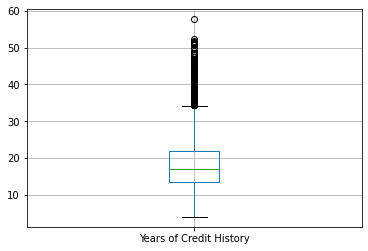

In [552]:
df_train.boxplot('Years of Credit History')
plt.show()

In [553]:
q_max = df_train['Years of Credit History'].quantile(0.99)

In [554]:
df_train['Years of Credit History'].clip(upper=q_max, axis=0, inplace=True)

### *Annual income*

In [555]:
df_train.corr()['Annual Income']

Annual Income                   1.000000
Years in current job            0.070285
Tax Liens                       0.066245
Number of Open Accounts         0.188524
Years of Credit History         0.190518
Maximum Open Credit             0.062218
Number of Credit Problems      -0.015407
Months since last delinquent   -0.101787
Bankruptcies                   -0.066877
Current Loan Amount             0.032082
Current Credit Balance          0.386481
Monthly Debt                    0.584819
Credit Score                   -0.037832
Credit Default                 -0.101375
Home Ownership_Home Mortgage    0.222966
Home Ownership_Own Home        -0.070768
Home Ownership_Rent            -0.185264
Term_Long Term                  0.096060
Term_Short Term                -0.096060
Purpose_debt consolidation     -0.045382
Purpose_home improvements       0.076814
Purpose_other                   0.002950
Name: Annual Income, dtype: float64

<AxesSubplot:xlabel='Annual Income'>

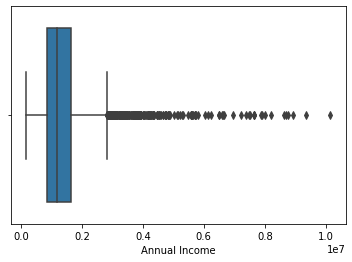

In [556]:
sns.boxplot(x='Annual Income', data=df_train)

In [557]:
df_train.loc[df_train['Annual Income'] > 0.5*10**7]

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,...,Credit Score,Credit Default,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Term_Long Term,Term_Short Term,Purpose_debt consolidation,Purpose_home improvements,Purpose_other
602,5631030.0,1,0.0,5.0,17.500000,0.0,0.0,NaN,0.0,100000000.0,...,743.0,0,1,0,0,0,1,0,1,0
693,5605950.0,1,0.0,12.0,23.100000,976074.0,0.0,9.0,0.0,757306.0,...,719.0,0,1,0,0,0,1,1,0,0
837,5131482.0,2,0.0,16.0,20.700001,4860504.0,0.0,16.0,0.0,756228.0,...,737.0,0,1,0,0,0,1,1,0,0
1025,8923844.0,3,0.0,15.0,17.200001,1452000.0,0.0,NaN,0.0,670428.0,...,723.0,0,0,0,1,0,1,1,0,0
1601,7999095.0,10,0.0,15.0,15.000000,6286192.0,0.0,30.0,0.0,762762.0,...,715.0,0,0,0,1,0,1,1,0,0
1615,6651900.0,10,0.0,13.0,25.100000,2155868.0,0.0,NaN,0.0,314380.0,...,719.0,0,0,1,0,1,0,1,0,0
1616,7907382.0,10,1.0,8.0,26.000000,1372536.0,1.0,NaN,0.0,763004.0,...,732.0,0,1,0,0,1,0,0,1,0
1984,8758449.0,10,0.0,10.0,20.600000,0.0,0.0,NaN,0.0,100000000.0,...,748.0,0,1,0,0,0,1,0,1,0
2169,5584271.0,4,0.0,8.0,6.800000,512622.0,0.0,NaN,0.0,100000000.0,...,739.0,0,0,0,1,0,1,0,1,0
2200,9338880.0,10,0.0,7.0,7.300000,1092608.0,0.0,NaN,0.0,788480.0,...,720.0,0,0,0,1,0,1,0,0,1


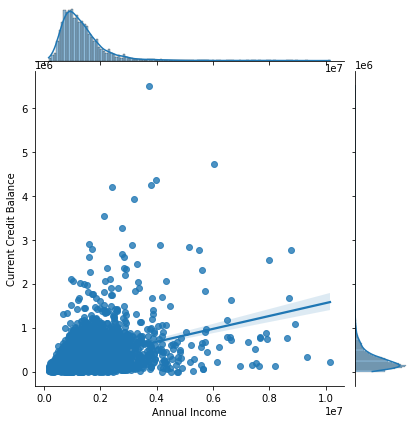

In [518]:
sns.jointplot(x=df_train['Annual Income'], y=df_train['Current Credit Balance'], kind='reg')

In [514]:
df_train[['Annual Income', 'Monthly Debt', 'Current Credit Balance']]

,Annual Income,Monthly Debt,Current Credit Balance
0,482087.0,7914.0,47386.0
1,1025487.0,18373.0,394972.0
2,751412.0,13651.0,308389.0
3,805068.0,11338.0,95855.0
4,776264.0,7180.0,93309.0
...,...,...,...
7495,402192.0,1900.0,73492.0
7496,1533984.0,12783.0,456399.0
7497,1878910.0,12479.0,477812.0
7498,NaN,37118.0,476064.0


In [457]:
df_train.loc[df_train['Annual Income'].isna()]

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,...,Credit Score,Credit Default,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Term_Long Term,Term_Short Term,Purpose_debt consolidation,Purpose_home improvements,Purpose_other
5,NaN,7,0.0,12.0,14.600000,366784.0,0.0,NaN,0.0,337304.0,...,NaN,1,0,0,1,1,0,0,0,1
8,NaN,5,0.0,17.0,15.700000,0.0,1.0,NaN,1.0,129734.0,...,NaN,0,1,0,0,0,1,0,1,0
9,NaN,1,0.0,10.0,24.600000,511302.0,0.0,6.0,0.0,572880.0,...,NaN,1,1,0,0,1,0,1,0,0
10,NaN,0,0.0,7.0,11.500000,256322.0,0.0,NaN,0.0,220858.0,...,NaN,0,1,0,0,0,1,1,0,0
16,NaN,7,0.0,6.0,17.799999,899492.0,0.0,NaN,0.0,313038.0,...,NaN,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7482,NaN,10,0.0,14.0,30.500000,645062.0,0.0,45.0,0.0,188430.0,...,NaN,0,1,0,0,0,1,1,0,0
7492,NaN,10,0.0,10.0,13.300000,423984.0,0.0,NaN,0.0,332948.0,...,NaN,0,1,0,0,0,1,1,0,0
7494,NaN,0,0.0,7.0,8.200000,301554.0,0.0,NaN,0.0,290400.0,...,NaN,0,0,1,0,0,1,1,0,0
7498,NaN,10,0.0,21.0,26.500000,1141250.0,0.0,NaN,0.0,615274.0,...,NaN,0,1,0,0,0,1,1,0,0


In [ ]:
df_train.loc[df_train['Average Annual Income'].isna()]

In [ ]:
# df_train['Annual Income NaN'] = 0
# df_train.loc[df_train['Annual Income'].isna(), 'Annual Income NaN'] = 1
df_train['Annual Income'].fillna(df_train['Average Annual Income'], inplace=True)
df_train['Annual Income'].fillna(df_train['Annual Income'].median(), inplace=True)

In [ ]:
df_train['Annual Income'].value_counts()

In [ ]:
df_train.loc[df_train['Annual Income'].isna()]

### *Maximum Open Credit*

In [ ]:
df_train.boxplot('Maximum Open Credit')
plt.show()

In [ ]:
df_train.loc[(df_train['Maximum Open Credit'] > 0.7 * 10**7), 'Credit Default'].value_counts()

In [ ]:
q_min = df_train['Maximum Open Credit'].quantile(0.01)

In [ ]:
 q_max = df_train['Maximum Open Credit'].quantile(0.99)

In [ ]:
df_train['Maximum Open Credit'].clip(upper=q_max, lower=q_min, axis=0, inplace=True)

### *Bankruptcies*

In [ ]:
df_train['Bankruptcies'].describe()

In [ ]:
df_train['Bankruptcies'].value_counts()

In [ ]:
df_train.corr()['Bankruptcies']

In [ ]:
grid = sns.jointplot(x=df_train.loc[df_train['Bankruptcies'] >= 0, 'Bankruptcies'], y=df_train['Number of Credit Problems'], kind='reg')

plt.show()

In [ ]:
# df_train['Bankruptcies NaN'] = 0
# df_train.loc[df_train['Bankruptcies'].isna(), 'Bankruptcies NaN'] = 1
df_train['Bankruptcies'].fillna(df_train['Bankruptcies'].median(), inplace=True)

In [ ]:
df_train.loc[df_train['Number of Credit Problems'] == df_train['Bankruptcies'], ['Number of Credit Problems', 'Bankruptcies']]

### *Months since last delinquent*

In [ ]:
df_train['Months since last delinquent'].value_counts()

In [ ]:
df_train['Months since last delinquent'].describe()

In [ ]:
df_train.corr()['Months since last delinquent']

In [ ]:
condition = df_train.groupby(['Bankruptcies', 'Home Ownership_Home Mortgage', 'Tax Liens'], as_index=False).agg({'Months since last delinquent' : 'median'}).rename(columns={'Months since last delinquent' : 'Average Delinquent'})

In [ ]:
condition

In [ ]:
df_train = df_train.merge(condition, on=['Bankruptcies', 'Home Ownership_Home Mortgage', 'Tax Liens'], how='left')
df_train.head(1)

In [ ]:
# df_train['Months since last delinquent NaN'] = 0
# df_train.loc[df_train['Months since last delinquent'].isna(), 'Months since last delinquent NaN'] = 1
# # df_train['Months since last delinquent'].fillna(df_train['Months since last delinquent'].median(), inplace=True)

In [ ]:
df_train['Months since last delinquent'].fillna(df_train['Average Delinquent'], inplace=True)

In [ ]:
df_train.drop('Average Delinquent', axis=1, inplace=True)

In [ ]:
df_train.info()

### Credit Score (пропуски и выбросы)

In [ ]:
df_train['Credit Score'].describe()

In [ ]:
df_train['Credit Score'].hist(bins=30)

plt.show()

In [ ]:
df_train['Credit Score'].quantile(0.9)

In [ ]:
df_train.loc[(df_train['Credit Score'] > 751), 'Credit Default'].value_counts()

In [ ]:
df_train['Credit Score'].quantile(0.01)

In [ ]:
df_train.loc[(df_train['Credit Score'] < 675), 'Credit Default'].value_counts()

In [ ]:
df_train.loc[df_train['Credit Score'] < 751.0, 'Credit Score'].hist(bins=30)
plt.show()

In [ ]:
df_train.loc[(df_train['Credit Score'] > 751) | (df_train['Credit Score'] < 625),
             'Credit Score'] = None 

In [ ]:
sns.boxplot(x='Credit Default', y='Credit Score', data=df_train)

In [ ]:
df_train['Credit Score'].count()

In [ ]:
df_train['Credit Score'].hist(bins=30)

In [ ]:
grid = sns.jointplot(x=df_train['Credit Score'], y=df_train['Credit Default'], kind='reg')

plt.show()

In [ ]:
df_train.corr()['Credit Score']

In [ ]:
condition = df_train.groupby(['Term_Long Term', 'Home Ownership_Rent'], as_index=False).agg({'Credit Score' : 'median'}).rename(columns={'Credit Score' : 'Median Score'})

In [ ]:
condition

In [ ]:
df_train = df_train.merge(condition, on=['Term_Long Term', 'Home Ownership_Rent'], how='left')

In [ ]:
# df_train['Credit Score NaN'] = 0
# df_train.loc[df_train['Credit Score'].isna(), 'Credit Score NaN'] = 1
df_train['Credit Score'].fillna(df_train['Median Score'], inplace=True)

In [ ]:
df_train.drop('Median Score', axis=1, inplace=True)

In [ ]:
df_train.sample()

### *Current Loan Amount*

In [ ]:
sns.boxplot(data=df_train, x='Current Loan Amount')
plt.show()

In [ ]:
df_train.corr()['Current Loan Amount']

In [ ]:
q_max = df_train['Current Loan Amount'].quantile(0.88)

In [ ]:
q_max

In [ ]:
condition = df_train['Current Loan Amount'] >= q_max
# df_train['Current Loan Amount Outlier'] = 0
# df_train.loc[condition, 'Current Loan Amount Outlier'] = 1
df_train.loc[condition, 'Current Loan Amount'] = None

In [ ]:
condition = df_train.groupby(['Credit Score', 'Term_Short Term'], as_index=False).agg({'Current Loan Amount' : 'median'}).rename(columns={'Current Loan Amount' : 'Median Current Loan Amount'})

In [ ]:
condition

In [ ]:
condition.loc[condition['Median Current Loan Amount'].isna()]

In [ ]:
df_train = df_train.merge(condition, on=['Credit Score'])

In [ ]:
df_train['Current Loan Amount'].fillna(df_train['Median Current Loan Amount'])

In [ ]:
df_train['Current Loan Amount'].fillna(df_train['Current Loan Amount'].median(), inplace=True)

In [ ]:
df_train.drop('Median Current Loan Amount', axis=1, inplace=True)

In [ ]:
sns.boxplot(data=df_train, x='Current Loan Amount')
plt.show()

# Нормализация

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
NUMERIC_FEATURE_NAMES = df_train.select_dtypes(include={'float32', 'int'}).columns.to_list()

In [ ]:
NUMERIC_FEATURE_NAMES

In [ ]:
df_train.info()

# *Построение модели*

In [ ]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score

# 3. Модели
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 4. Метрики качества
from sklearn.metrics import f1_score as f1

In [ ]:
X = df.drop(columns='Credit Default')

In [ ]:
y = df['Credit Default']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=100)

In [ ]:
X_train.info()

In [ ]:
X_test.info()

In [ ]:
X_test['Months since last delinquent'].describe()

### Gradient Boosting Classifier

In [ ]:
clf = GradientBoostingClassifier(
#     max_depth=8,
#                                  n_estimators=150,
#                                  min_samples_split=40,
#                                  min_samples_leaf=1,
                                 random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

f1(y_test, y_pred)

In [ ]:
y_pred = clf.predict(X_train)
f1(y_train, y_pred)

### Decision Tree Classifier

In [ ]:
max_depth_values = np.arange(2, 20)

accuracy_on_test = []
accuracy_on_train = []

for i, value in enumerate(max_depth_values):
    clf = DecisionTreeClassifier(max_depth=value,
                                max_leaf_nodes=100,
                                min_samples_leaf=2,
                                random_state=42)
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
        
    acc_test = f1(y_test, y_pred)
    acc_train = f1(y_train, y_pred_train)
    
    if i % 4 == 2:
        print('K = {}'.format(value))
        print('\tf1_test = {}'.format(acc_test))
        print('\tf1_train = {}\n'.format(acc_train))
    
    accuracy_on_test.append(acc_test)
    accuracy_on_train.append(acc_train)

In [ ]:
plt.rcParams['figure.figsize'] = 6, 4

plt.plot(max_depth_values, accuracy_on_test, label="test")
plt.plot(max_depth_values, accuracy_on_train, label="train")

plt.xlabel('Значение параметра max_depth')
plt.ylabel('Accuracy')

plt.legend()
plt.grid()

plt.show()

In [ ]:
clf = DecisionTreeClassifier(max_depth=10,
                            max_leaf_nodes=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

f1(y_test, y_pred)

In [ ]:
feature_importances = pd.DataFrame(zip(X_train.columns, 
                                       clf.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)

In [ ]:
feature_importances

In [ ]:
y_pred = clf.predict(df_test)

In [ ]:
df_test